In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

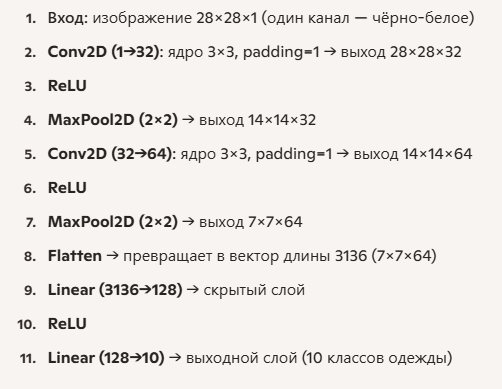

сравнение нашей кастомной свёрточной сети и lenet
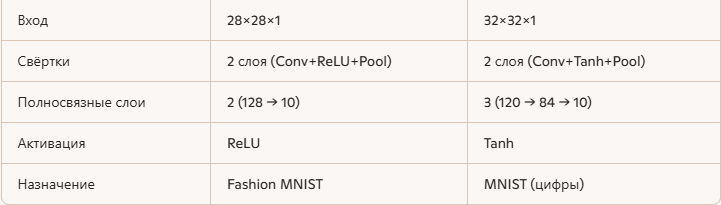

In [ ]:
# Трансформации: преобразование в тензор и нормализация
transform = transforms.Compose([
    transforms.ToTensor(), # преобразовывает изображение в тензор
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка тренировочного и тестового датасета
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

# DataLoader для пакетной загрузки
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(2)
        )
        self.fc_layer = nn.Sequential(  # блок полносвязных слоёв
            nn.Flatten(),               # превращает 3D тензор в одномерный
            nn.Linear(64 * 7 * 7, 128), # первый полносвязный слой
            nn.ReLU(),
            nn.Linear(128, 10)          # выходной слой, на выходе - 10 классов для одежды
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cpu


In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.4760
Epoch 2, Loss: 0.3102
Epoch 3, Loss: 0.2638
Epoch 4, Loss: 0.2335
Epoch 5, Loss: 0.2112


In [ ]:
# padding = 1, обучение заняло 7 минут (5 эпох)
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 90.79%


In [ ]:
#padding = 0 (на времени не сказалось, а вот точность повысилась).
# За счёт того, что у нас не так много свёрток и из-за специфики изображений (предмет одежды расположен в основном в центре),
# мы не теряем ничего важного при свёртке, при этом не вносим смуту дополнительными синтетическими пикселями
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 91.58%


In [ ]:
# avg pooling вместо max pooling, время не изменилось, а вот точность выше чем с макс пулингом
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 91.06%
